In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 상품성과 전처리

In [ ]:
# 데이터 불러오기
상품성과1 = pd.read_csv('상품성과_1.csv')
상품성과2 = pd.read_csv('상품성과_2.csv')
상품성과3 = pd.read_csv('상품성과_3.csv')
상품성과4 = pd.read_csv('상품성과_4.csv')

In [ ]:
전체데이터_상품성과 = [상품성과1, 상품성과2, 상품성과3, 상품성과4]

In [ ]:
 # '%' 기호를 제거하고 숫자로 변환한 뒤 100을 곱하여 백분율로 변환
def text_to_percentage(text):
    try:
        return float(text.strip('%')) / 100.0
    except ValueError:
        # 변환에 실패한 경우 0.0 반환
        return 0.0

In [ ]:
# 비율컬럼 전체 데이터 변환
change_columns = ['모바일비율(결제상품수량)','환불비율(결제금액)', '환불비율(결제상품수량)', '모바일비율(결제금액)']
for 데이터 in 전체데이터_상품성과:
    for columns in change_columns:
        데이터[columns] = 데이터[columns].apply(text_to_percentage)

In [ ]:
# '상품명 앞 [...] 값'을 추출하는 함수
def extract_prefix_value(text):
    start_index = text.find('[')
    end_index = text.find(']')
    if start_index >= 0 and end_index >= 0:
        return text[start_index + 1:end_index]
    else:
        return ''

In [ ]:
# '[...]' 값을 삭제하는 함수
def remove_brackets(text):
    start_index = text.find('[')
    end_index = text.find(']')
    if start_index >= 0 and end_index >= 0:
        return text[end_index + 1:].strip()
    else:
        return text

In [ ]:

# '상품명 앞 [...] 값'을 상품명_분류로 저장
for 데이터 in 전체데이터_상품성과:
    데이터['상품명_분류'] = 데이터['상품명'].apply(extract_prefix_value)
    데이터['상품명'] = 데이터['상품명'].apply(remove_brackets)

In [ ]:
# '/'를 기준으로 뒤에 오는 값을 추출하는 함수
def extract_suffix_value(text):
    index = text.find('/')
    if index >= 0:
        return text[index + 1:]
    else:
        return ''

In [ ]:
# '상품명_분류 /값으로 나누어 저장
for 데이터 in 전체데이터_상품성과:
    데이터['상품명_분류(세)'] = 데이터['상품명_분류'].apply(extract_suffix_value)
    데이터['상품명_분류'] = 데이터['상품명_분류'].apply(lambda text: text.split('/')[0])

In [ ]:
상품성과1['기간'] = '220101-220630'
상품성과2['기간'] = '220701-221231'
상품성과3['기간'] = '230101-230630'
상품성과4['기간'] = '230101-230630'

In [ ]:
# 모든 데이터프레임을 하나로 합치기
상품성과 = pd.concat([상품성과1, 상품성과2, 상품성과3, 상품성과4], ignore_index=True)

In [ ]:
상품성과['상품ID'] = 상품성과['상품ID'].astype(str)

In [ ]:
상품성과.describe()

,결제수,모바일비율(결제상품수량),모바일비율(결제금액),주문쿠폰,환불건수,환불비율(결제금액),환불수량,환불비율(결제상품수량)
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000
mean,23.445000,0.809200,0.809250,0.0,1.240000,0.055150,1.850000,0.055350
std,32.775113,0.248245,0.247881,0.0,2.176254,0.130634,3.491195,0.130715
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.750000,0.750000,0.0,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.860000,0.860000,0.0,0.000000,0.000000,0.000000,0.000000
75%,29.250000,1.000000,1.000000,0.0,1.000000,0.060000,2.000000,0.060000
max,156.000000,1.000000,1.000000,0.0,13.000000,1.000000,21.000000,1.000000


In [ ]:
상품성과

,상품카테고리(대),상품카테고리(중),상품카테고리(소),상품카테고리(세),상품명,상품ID,결제수,결제상품수량,모바일비율(결제상품수량),결제금액,...,상품쿠폰,주문쿠폰,환불건수,환불금액,환불비율(결제금액),환불수량,환불비율(결제상품수량),상품명_분류,상품명_분류(세),기간
0,식품,음료,커피,원두/생두,클래식 블렌딩 / 1kg / 커피템플,6295724021,70,610,0.36,"16,775,000",...,0,0,1,"577,500",0.03,21,0.03,사업자,,220101-220630
1,식품,음료,커피,원두/생두,클래식 블렌딩 / 1kg / 커피템플,5776196315,82,474,0.81,"11,850,000",...,0,0,0,0,0.00,0,0.00,사업자,골드클래스,220101-220630
2,생활/건강,주방용품,잔/컵,머그,스페인 소믈리에 아로마챔버 에스프레소컵,6332945868,97,102,0.87,"9,996,000",...,0,0,11,"1,078,000",0.11,11,0.11,에스프레소컵,,220101-220630
3,식품,음료,커피,원두/생두,클래식 블렌딩 / 1kg / 커피템플,5576934474,84,101,0.82,"4,545,000",...,0,0,6,"270,000",0.06,6,0.06,대용량,원두커피,220101-220630
4,식품,음료,커피,원두/생두,쥬시 블렌딩 / 1kg / 커피템플,5576944562,78,86,0.80,"3,870,000",...,0,0,7,"315,000",0.08,7,0.08,대용량,원두커피,220101-220630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,식품,음료,커피,원두/생두,커피안의 감정 : 몰입 / 암흑물질 / 100g / 커피템플,8598378782,4,4,0.75,"40,000",...,0,0,1,"10,000",0.25,1,0.25,원두커피,,230101-230630
196,식품,음료,커피,드립백/티백,"커피템플 대표 드립백커피 4종 쥬시, 클래식, 에티오피아, 디카프 / 10g x 10ea",8519579250,1,1,1.00,"36,000",...,0,0,0,0,0.00,0,0.00,2+1이벤트,,230101-230630
197,식품,음료,커피,원두/생두,싱글오리진 에티오피아 시다모 봄베 타리쿠 카레 / 200g / 커피템플,7900270762,2,2,0.50,"36,000",...,0,0,1,"18,000",0.50,1,0.50,원두커피,,230101-230630
198,식품,음료,커피,드립백/티백,커피캡슐 샘플러 / 5.5gx4ea / 네스프레소 호환 커피캡슐 / 커피템플,8172010913,3,4,1.00,"20,000",...,0,0,0,0,0.00,0,0.00,캡슐커피,,230101-230630


In [ ]:
print(상품성과.dtypes)

상품카테고리(대)         object
상품카테고리(중)         object
상품카테고리(소)         object
상품카테고리(세)         object
상품명               object
상품ID              object
결제수                int64
결제상품수량            object
모바일비율(결제상품수량)    float64
결제금액              object
모바일비율(결제금액)      float64
상품수당 결제금액         object
쿠폰합계              object
상품쿠폰              object
주문쿠폰               int64
환불건수               int64
환불금액              object
환불비율(결제금액)       float64
환불수량               int64
환불비율(결제상품수량)     float64
상품명_분류            object
상품명_분류(세)         object
기간                object
dtype: object


In [ ]:
상품성과.describe()

,결제수,모바일비율(결제상품수량),모바일비율(결제금액),주문쿠폰,환불건수,환불비율(결제금액),환불수량,환불비율(결제상품수량)
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000
mean,23.445000,0.809200,0.809250,0.0,1.240000,0.055150,1.850000,0.055350
std,32.775113,0.248245,0.247881,0.0,2.176254,0.130634,3.491195,0.130715
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.750000,0.750000,0.0,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.860000,0.860000,0.0,0.000000,0.000000,0.000000,0.000000
75%,29.250000,1.000000,1.000000,0.0,1.000000,0.060000,2.000000,0.060000
max,156.000000,1.000000,1.000000,0.0,13.000000,1.000000,21.000000,1.000000


In [ ]:
상품성과.isnull().sum()

상품카테고리(대)        0
상품카테고리(중)        0
상품카테고리(소)        0
상품카테고리(세)        0
상품명              0
상품ID             0
결제수              0
결제상품수량           0
모바일비율(결제상품수량)    0
결제금액             0
모바일비율(결제금액)      0
상품수당 결제금액        0
쿠폰합계             0
상품쿠폰             0
주문쿠폰             0
환불건수             0
환불금액             0
환불비율(결제금액)       0
환불수량             0
환불비율(결제상품수량)     0
상품명_분류           0
상품명_분류(세)        0
기간               0
dtype: int64

In [ ]:
상품성과.isnull().sum()

상품카테고리(대)        0
상품카테고리(중)        0
상품카테고리(소)        0
상품카테고리(세)        0
상품명              0
상품ID             0
결제수              0
결제상품수량           0
모바일비율(결제상품수량)    0
결제금액             0
모바일비율(결제금액)      0
상품수당 결제금액        0
쿠폰합계             0
상품쿠폰             0
주문쿠폰             0
환불건수             0
환불금액             0
환불비율(결제금액)       0
환불수량             0
환불비율(결제상품수량)     0
상품명_분류           0
상품명_분류(세)        0
기간               0
dtype: int64

# 마케팅채널 전처리

In [ ]:
# 데이터 불러오기
마케팅채널1 = pd.read_csv('마케팅채널_1.csv')
마케팅채널2 = pd.read_csv('마케팅채널_2.csv')
마케팅채널3 = pd.read_csv('마케팅채널_3.csv')

FileNotFoundError: ignored

In [ ]:
마케팅채널1.head()

In [ ]:
전체데이터_마케팅 = [마케팅채널1, 마케팅채널2, 마케팅채널3]

In [ ]:
for 데이터 in 전체데이터_마케팅:
    데이터['상품명_분류'] = 데이터['상품명'].apply(extract_prefix_value)
    데이터['상품명'] = 데이터['상품명'].apply(remove_brackets)

NameError: ignored

In [ ]:
for 데이터 in 전체데이터_마케팅:
    데이터['상품명_분류(세)'] = 데이터['상품명_분류'].apply(extract_suffix_value)
    데이터['상품명_분류'] = 데이터['상품명_분류'].apply(lambda text: text.split('/')[0])

In [ ]:
마케팅채널1['기간'] = '220101-220630'
마케팅채널2['기간'] = '220701-221231'
마케팅채널3['기간'] = '230101-230531'

In [ ]:
# 모든 데이터프레임을 하나로 합치기
마케팅채널 = pd.concat([마케팅채널1, 마케팅채널2, 마케팅채널3], ignore_index=True)

In [ ]:
마케팅채널['상품ID'] = 마케팅채널['상품ID'].astype(str)

In [ ]:
# '채널상세' 컬럼 삭제
마케팅채널.drop(columns=['채널상세'], inplace=True)

In [ ]:
마케팅채널.isnull().sum()

상품카테고리(대)              0
상품카테고리(중)              0
상품카테고리(소)              0
상품카테고리(세)              0
상품명                    0
상품ID                   0
채널그룹                   0
채널명                    0
결제수(과거 14일간 기여도추정)     0
결제금액(과거 14일간 기여도추정)    0
상품명_분류                 0
상품명_분류(세)              0
기간                     0
dtype: int64

In [ ]:
print(마케팅채널.dtypes)

상품카테고리(대)              object
상품카테고리(중)              object
상품카테고리(소)              object
상품카테고리(세)              object
상품명                    object
상품ID                   object
채널그룹                   object
채널명                    object
결제수(과거 14일간 기여도추정)      int64
결제금액(과거 14일간 기여도추정)    object
상품명_분류                 object
상품명_분류(세)              object
기간                     object
dtype: object


In [ ]:
# ',' 제거하고 숫자 형식으로 변경
마케팅채널['결제금액(과거 14일간 기여도추정)'] = 마케팅채널['결제금액(과거 14일간 기여도추정)'].str.replace(',', '').astype(int)

In [ ]:
마케팅채널.describe()

,결제수(과거 14일간 기여도추정),결제금액(과거 14일간 기여도추정)
count,829.000000,8.290000e+02
mean,5.235223,2.602080e+05
std,8.223856,1.302467e+06
min,0.000000,9.000000e+00
25%,1.000000,3.000000e+04
50%,2.000000,8.752800e+04
75%,7.000000,1.988230e+05
max,115.000000,3.190000e+07


In [ ]:
마케팅채널

,상품카테고리(대),상품카테고리(중),상품카테고리(소),상품카테고리(세),상품명,상품ID,채널그룹,채널명,결제수(과거 14일간 기여도추정),결제금액(과거 14일간 기여도추정),상품명_분류,상품명_분류(세),기간
0,식품,음료,커피,원두/생두,클래식 블렌딩 / 1kg / 커피템플,6295724021,(알수없음),(알수없음),46,12210000,사업자,,220101-220630
1,식품,음료,커피,원두/생두,클래식 블렌딩 / 1kg / 커피템플,5776196315,(알수없음),(알수없음),68,9425000,사업자,골드클래스,220101-220630
2,생활/건강,주방용품,잔/컵,머그,스페인 소믈리에 아로마챔버 에스프레소컵,6332945868,소셜,인스타그램,33,3405907,에스프레소컵,,220101-220630
3,식품,음료,커피,원두/생두,클래식 블렌딩 / 1kg / 커피템플,6295724021,검색,네이버검색,12,2546583,사업자,,220101-220630
4,식품,음료,커피,원두/생두,쥬시 블렌딩 / 1kg / 커피템플,6295717556,(알수없음),(알수없음),20,2244000,사업자,,220101-220630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,식품,음료,커피,원두/생두,클래식 블렌딩 / 1kg / 커피템플,6985871235,검색,네이버검색,0,147,샘플,사업자,230101-230531
825,식품,음료,커피,드립백/티백,드립백커피 샘플러 / 10gx4ea / 커피템플,8378279956,일반유입,네이버 모바일메인,0,93,드립백커피,,230101-230531
826,식품,음료,커피,원두/생두,디카페인 싱글오리진 / 200g / 커피템플,7790372403,쇼핑,네이버쇼핑-검색,0,65,원두커피,,230101-230531
827,식품,음료,커피,원두/생두,디카페인 블렌딩 / 1kg / 커피템플,6994441996,쇼핑,네이버쇼핑-통합검색,0,22,샘플,사업자,230101-230531


# 검색채널 전처리

In [ ]:
# 데이터 불러오기
검색채널1 = pd.read_csv('검색채널_1.csv')
검색채널2 = pd.read_csv('검색채널_2.csv')
검색채널3 = pd.read_csv('검색채널_3.csv')

In [ ]:
검색채널1.head()

,상품카테고리(대),상품카테고리(중),상품카테고리(소),상품카테고리(세),상품명,상품ID,채널그룹,채널명,키워드,결제수(과거 14일간 기여도추정),결제금액(과거 14일간 기여도추정)
0,식품,음료,커피,원두/생두,[사업자] 클래식 블렌딩 / 1kg / 커피템플,6295724021,검색,네이버검색,커피템플,6,"1,860,980"
1,생활/건강,주방용품,잔/컵,머그,[에스프레소컵] 스페인 소믈리에 아로마챔버 에스프레소컵,6332945868,검색,네이버검색,커피템플,10,"1,077,560"
2,식품,음료,커피,원두/생두,[대용량 / 원두커피] 쥬시 블렌딩 / 1kg / 커피템플,5576944562,쇼핑,네이버쇼핑-검색,커피템플,9,"549,904"
3,식품,음료,커피,원두/생두,[대용량 / 원두커피] 쥬시 블렌딩 / 1kg / 커피템플,5576944562,검색,네이버검색,커피템플,11,"519,351"
4,식품,음료,커피,원두/생두,[대용량 / 원두커피] 클래식 블렌딩 / 1kg / 커피템플,5576934474,검색,네이버검색,커피템플,7,"479,807"


In [ ]:
전체데이터_검색채널 = [검색채널1, 검색채널2, 검색채널3]

In [ ]:
for 데이터 in 전체데이터_검색채널:
    데이터['상품명_분류'] = 데이터['상품명'].apply(extract_prefix_value)
    데이터['상품명'] = 데이터['상품명'].apply(remove_brackets)

In [ ]:
for 데이터 in 전체데이터_검색채널:
    데이터['상품명_분류(세)'] = 데이터['상품명_분류'].apply(extract_suffix_value)
    데이터['상품명_분류'] = 데이터['상품명_분류'].apply(lambda text: text.split('/')[0])

In [ ]:
검색채널1['기간'] = '220101-220630'
검색채널2['기간'] = '220701-221231'
검색채널3['기간'] = '230101-230531'

In [ ]:
# 모든 데이터프레임을 하나로 합치기
검색채널 = pd.concat([검색채널1, 검색채널2, 검색채널3], ignore_index=True)

In [ ]:
검색채널['상품ID'] = 마케팅채널['상품ID'].astype(str)

In [ ]:
# ',' 제거하고 숫자 형식으로 변경
검색채널['결제금액(과거 14일간 기여도추정)'] = 검색채널['결제금액(과거 14일간 기여도추정)'].str.replace(',', '').astype(int)

In [ ]:
검색채널.describe()

,결제수(과거 14일간 기여도추정),결제금액(과거 14일간 기여도추정)
count,758.000000,7.580000e+02
mean,2.151715,7.664019e+04
std,3.617357,1.567099e+05
min,0.000000,0.000000e+00
25%,1.000000,1.368175e+04
50%,1.000000,3.078250e+04
75%,2.000000,7.115375e+04
max,33.000000,1.860980e+06


In [ ]:
검색채널.isnull().sum()

상품카테고리(대)              0
상품카테고리(중)              0
상품카테고리(소)              0
상품카테고리(세)              0
상품명                    0
상품ID                   0
채널그룹                   0
채널명                    0
키워드                    0
결제수(과거 14일간 기여도추정)     0
결제금액(과거 14일간 기여도추정)    0
상품명_분류                 0
상품명_분류(세)              0
기간                     0
dtype: int64

# 상품성과 전처리 추가

In [ ]:
# '상품명_분류' 열에서 앞뒤 스페이스바 제거하는 코드
상품성과['상품명_분류(세)'] = 상품성과['상품명_분류(세)'].str.strip()
# '상품명_분류' 열에서 앞뒤 스페이스바 제거하는 코드
상품성과['상품명_분류'] = 상품성과['상품명_분류'].str.strip()
# 상품명_분류가 '사업자'인 데이터를 제거하는 코드
소비자_상품성과 = 상품성과[(상품성과['상품명_분류'] != '사업자') & (상품성과['상품명_분류(세)'] != '사업자')]

In [ ]:
# 상품명에 따라 카테고리 할당하는 함수
def categorize_product(product_name):
    if '디카페인' in product_name:
        return '제품G'
    elif '선물' in product_name:
        return '선물'
    elif '쥬시 블렌딩' in product_name:
        return '제품B'
    elif '클래식 블렌딩' in product_name or '클래식' in product_name :
        return '제품A'
    elif '게스트바리스타' in product_name or '암흑물질' in product_name :
        return '제품E'
    elif '싱글오리진' in product_name or '게이샤' in product_name or '파카마라' in product_name or '에콰도르' in product_name or '커피안의 감정' in product_name:
        return '제품F'
    elif '샘플러' in product_name or '4종' in product_name:
        return '제품H'
    else:
        return '제품C'

# apply 함수를 사용하여 각 상품명에 대해 카테고리 할당
소비자_상품성과['상품카테고리'] = 소비자_상품성과['상품명'].apply(categorize_product)

<ipython-input-20-aaf791682954>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  소비자_상품성과['상품카테고리'] = 소비자_상품성과['상품명'].apply(categorize_product)


In [ ]:
# 상품명에 따라 카테고리 할당하는 함수
def categorize_products(product_name):
    if '원두/생두' in product_name:
        return '형태A'
    elif '드립백/티백' in product_name:
        return '형태B'
    elif '머그' in product_name:
        return '형태C'
    elif '캡슐커피' in product_name:
        return '형태D'
    elif '-' in product_name:
        return '형태E'
    elif '패션브로치' in product_name:
        return '형태F'
# apply 함수를 사용하여 각 상품명에 대해 카테고리 할당
소비자_상품성과['상품카테고리(세)'] = 소비자_상품성과['상품카테고리(세)'].apply(categorize_products)

<ipython-input-23-3783bebce9ba>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  소비자_상품성과['상품카테고리(세)'] = 소비자_상품성과['상품카테고리(세)'].apply(categorize_products)


In [ ]:
소비자_상품성과.loc[소비자_상품성과['상품카테고리(대)'] != '식품', '상품카테고리'] = '제품D'

In [ ]:
# 상품카테고리가 "선물"인 데이터 삭제
소비자_상품성과 = 소비자_상품성과.drop(소비자_상품성과[소비자_상품성과['상품카테고리'] == '선물'].index)

In [ ]:
소비자_상품성과 = 소비자_상품성과.drop(['상품카테고리(대)', '상품카테고리(중)', '상품카테고리(소)', '모바일비율(결제상품수량)', '모바일비율(결제금액)','쿠폰합계', '상품쿠폰', '주문쿠폰'], axis=1)

In [ ]:
소비자_상품성과 = 소비자_상품성과.drop(['상품명_분류', '상품명_분류(세)' ], axis=1)

In [ ]:
소비자_상품성과 = 소비자_상품성과.drop(['상품수당 결제금액' ], axis=1)

In [ ]:
소비자_상품성과 = 소비자_상품성과.drop(['환불건수', '환불비율(결제금액)', '환불비율(결제상품수량)'], axis=1)

In [ ]:
소비자_상품성과['결제금액'] = 소비자_상품성과['결제금액'].str.replace(',', '').astype(int)

In [ ]:
소비자_상품성과['환불금액'] = 소비자_상품성과['환불금액'].str.replace(',', '').astype(int)

In [ ]:

소비자_상품성과['결제상품수량'] = 소비자_상품성과['결제상품수량'].astype(int)

In [ ]:
소비자_상품성과['결제상품수량'] = 소비자_상품성과['결제상품수량'] - 소비자_상품성과['환불수량']

In [ ]:
소비자_상품성과['결제금액'] = 소비자_상품성과['결제금액'] - 소비자_상품성과['환불금액']

In [ ]:
소비자_상품성과 = 소비자_상품성과.drop(['환불금액', '환불수량'], axis=1)

In [ ]:
# 상품 ID가 같은 행들을 합쳐서 수량과 갯수를 합산하여 하나의 행으로 합치기
소비자_상품성과 = 소비자_상품성과.groupby(['상품ID', '기간']).agg({
    '상품명': 'first',  # 상품명은 첫 번째 값으로 유지
    '상품카테고리(세)' : 'first',
    '결제수' : 'sum',
    '결제상품수량': 'sum',      # 수량은 합산
    '결제금액': 'sum',       # 갯수는 합산
    '상품카테고리' : 'first'
}).reset_index()

In [ ]:
소비자_상품성과.head(5)

,상품ID,기간,상품명,상품카테고리(세),결제수,결제상품수량,결제금액,상품카테고리
0,5351764329,220101-220630,클래식 블렌딩 / 200g / 커피템플,원두/생두,117,130,2064000,제품A
1,5351764329,220701-221231,클래식 블렌딩 / 200g / 커피템플,원두/생두,120,137,2192000,제품A
2,5351764329,230101-230630,클래식 블렌딩 / 200g / 커피템플,원두/생두,132,150,2383000,제품A
3,5351818905,220101-220630,쥬시 블렌딩 / 200g / 커피템플,원두/생두,130,132,2097000,제품B
4,5351818905,220701-221231,쥬시 블렌딩 / 200g / 커피템플,원두/생두,140,150,2400000,제품B


In [ ]:
# CSV 파일로 export
소비자_상품성과.to_excel('소비자_상품성과.xlsx', index=False)

In [ ]:
# CSV 파일로 export
소비자_상품성과.to_csv('소비자_상품성과.csv', index=False)

In [ ]:
소비자_상품성과[소비자_상품성과['상품카테고리'] == '샘플러']

,상품ID,기간,상품명,상품카테고리(세),결제수,결제상품수량,결제금액,상품카테고리


In [ ]:
소비자_상품성과[소비자_상품성과['상품카테고리'] == '그외']

,상품ID,기간,상품명,상품카테고리(세),결제수,결제상품수량,결제금액,상품카테고리


In [ ]:
소비자_상품성과['상품카테고리(세)'] = 소비자_상품성과['상품카테고리(세)'].replace('-', '티셔츠')

## 시각화

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import koreanize_matplotlib

In [ ]:
소비자_상품성과

,상품ID,기간,상품명,상품카테고리(세),결제수,결제상품수량,결제금액,상품카테고리
0,5351764329,220101-220630,클래식 블렌딩 / 200g / 커피템플,원두/생두,117,130,2064000,제품A
1,5351764329,220701-221231,클래식 블렌딩 / 200g / 커피템플,원두/생두,120,137,2192000,제품A
2,5351764329,230101-230630,클래식 블렌딩 / 200g / 커피템플,원두/생두,132,150,2383000,제품A
3,5351818905,220101-220630,쥬시 블렌딩 / 200g / 커피템플,원두/생두,130,132,2097000,제품B
4,5351818905,220701-221231,쥬시 블렌딩 / 200g / 커피템플,원두/생두,140,150,2400000,제품B
...,...,...,...,...,...,...,...,...
104,8519579250,230101-230630,"커피템플 대표 드립백커피 4종 쥬시, 클래식, 에티오피아, 디카프 / 10g x 10ea",드립백/티백,54,62,2290000,제품A
105,8525754003,230101-230630,게스트바리스타 / 문워크 100g / 스페셜티커피 / 이월로스터스 / 커피큐레이션,원두/생두,66,91,1084000,제품E
106,8590615947,230101-230630,"암흑물질, atmosphere 드립백세트 / 10gx4ea / 커피템플",드립백/티백,4,7,103000,제품E
107,8598378782,230101-230630,커피안의 감정 : 몰입 / 암흑물질 / 100g / 커피템플,원두/생두,8,7,90000,제품E


In [ ]:
# 상품명에 따라 카테고리 할당하는 함수
def categorize_products(product_name):
    if '220101-220630' in product_name:
        return '2022 상반기'
    elif '220701-221231' in product_name:
        return '2022 하반기'
    elif '230101-230630' in product_name:
        return '2023 상반기'

# apply 함수를 사용하여 각 상품명에 대해 카테고리 할당
소비자_상품성과['기간'] = 소비자_상품성과['기간'].apply(categorize_products)

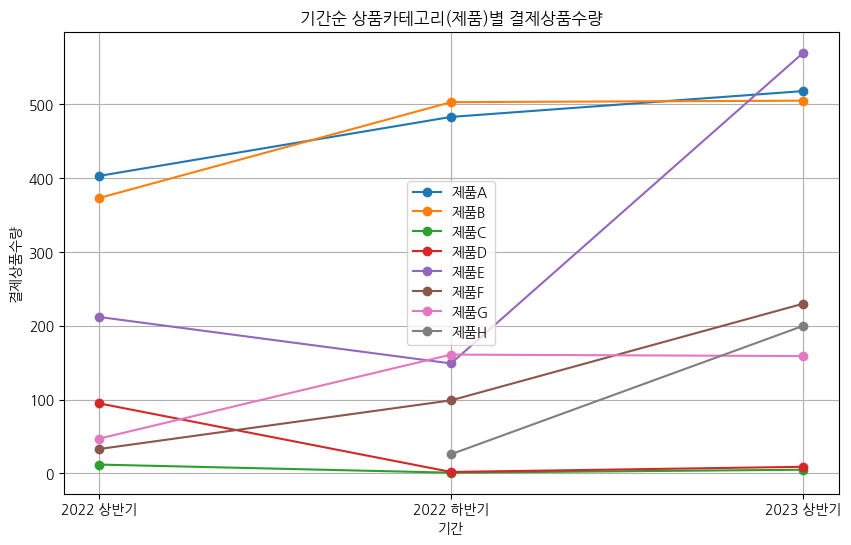

In [ ]:
# 기간과 상품카테고리를 기준으로 데이터프레임을 그룹화하고, 상품판매수량 합을 계산
grouped = 소비자_상품성과.groupby(['기간', '상품카테고리'])['결제상품수량'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
for category in 소비자_상품성과['상품카테고리'].unique():
    category_data = grouped[grouped['상품카테고리'] == category]
    plt.plot(category_data['기간'], category_data['결제상품수량'], marker='o', label=category)
    #데이터 포인트에 수치 표시
    #for i, j in zip(category_data['기간'], category_data['결제상품수량']):
    #    plt.text(i, j, str(j))

plt.xlabel('기간')
plt.ylabel('결제상품수량')
plt.title('기간순 상품카테고리(제품)별 결제상품수량')
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()

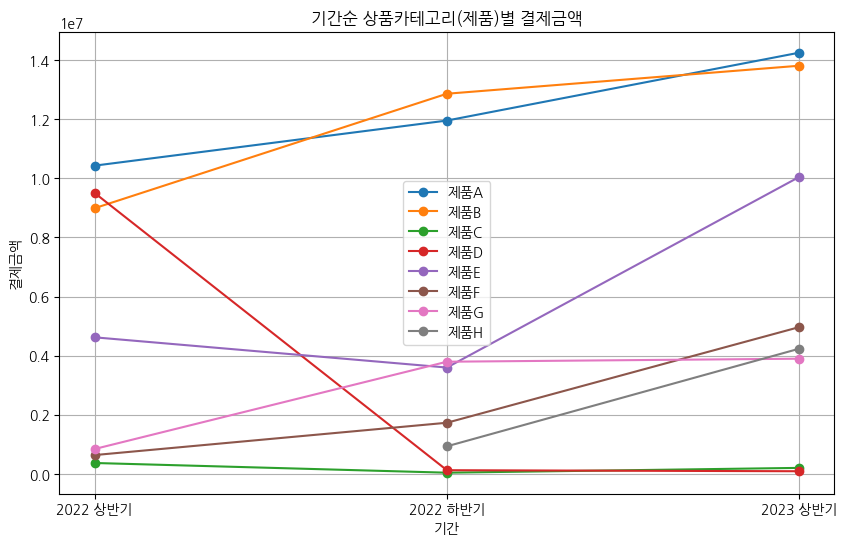

In [ ]:
# 기간과 상품카테고리를 기준으로 데이터프레임을 그룹화하고, 상품판매수량 합을 계산
grouped = 소비자_상품성과.groupby(['기간', '상품카테고리'])['결제금액'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
for category in 소비자_상품성과['상품카테고리'].unique():
    category_data = grouped[grouped['상품카테고리'] == category]
    plt.plot(category_data['기간'], category_data['결제금액'], marker='o', label=category)

plt.xlabel('기간')
plt.ylabel('결제금액')
plt.title('기간순 상품카테고리(제품)별 결제금액')

plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()

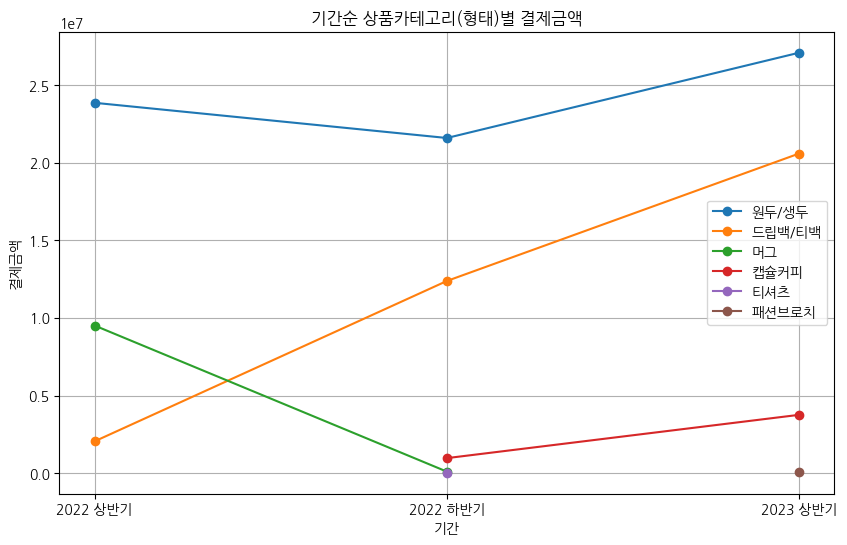

In [ ]:
# 기간과 상품카테고리를 기준으로 데이터프레임을 그룹화하고, 상품판매수량 합을 계산
grouped = 소비자_상품성과.groupby(['기간', '상품카테고리(세)'])['결제금액'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
for category in 소비자_상품성과['상품카테고리(세)'].unique():
    category_data = grouped[grouped['상품카테고리(세)'] == category]
    plt.plot(category_data['기간'], category_data['결제금액'], marker='o', label=category)
    # 데이터 포인트에 수치 표시
    #for i, j in zip(category_data['기간'], category_data['결제금액']):
    #   plt.text(i, j, str(j))

plt.xlabel('기간')
plt.ylabel('결제금액')
plt.title('기간순 상품카테고리(형태)별 결제금액')
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()

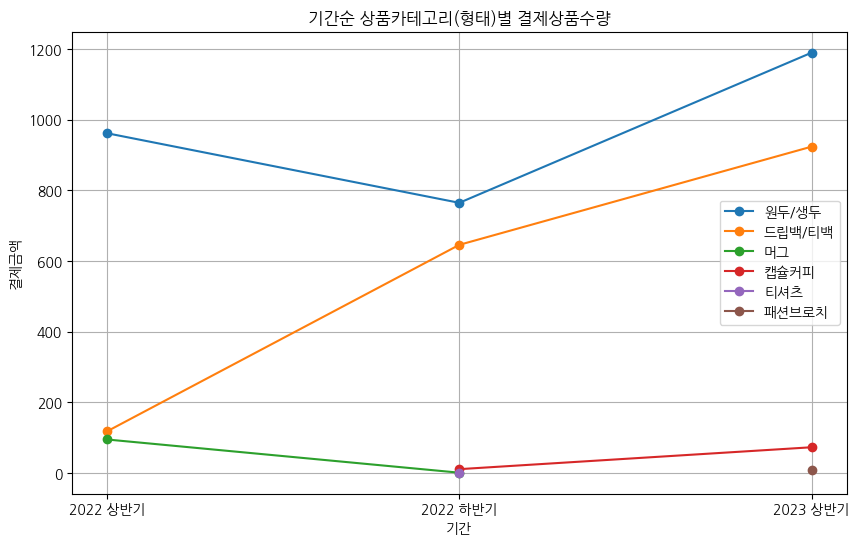

In [ ]:
# 기간과 상품카테고리를 기준으로 데이터프레임을 그룹화하고, 상품판매수량 합을 계산
grouped = 소비자_상품성과.groupby(['기간', '상품카테고리(세)'])['결제상품수량'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
for category in 소비자_상품성과['상품카테고리(세)'].unique():
    category_data = grouped[grouped['상품카테고리(세)'] == category]
    plt.plot(category_data['기간'], category_data['결제상품수량'], marker='o', label=category)
    # 데이터 포인트에 수치 표시
    #for i, j in zip(category_data['기간'], category_data['결제상품수량']):
    #    plt.text(i, j, str(j))

plt.xlabel('기간')
plt.ylabel('결제금액')
plt.title('기간순 상품카테고리(형태)별 결제상품수량')

plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()

# 결혼여부

In [ ]:
# 데이터 불러오기
결혼여부1 = pd.read_csv('결혼여부_1.csv')
결혼여부2 = pd.read_csv('결혼여부_2.csv')
결혼여부3 = pd.read_csv('결혼여부_3.csv')

FileNotFoundError: ignored

In [ ]:
전체데이터_결혼여부 = [결혼여부1, 결혼여부2, 결혼여부3]

In [ ]:
# '상품명 앞 [...] 값'을 상품명_분류로 저장
for 데이터 in 전체데이터_결혼여부:
    데이터['상품명_분류'] = 데이터['상품명'].apply(extract_prefix_value)
    데이터['상품명'] = 데이터['상품명'].apply(remove_brackets)

In [ ]:
# '상품명_분류 /값으로 나누어 저장
for 데이터 in 전체데이터_결혼여부:
    데이터['상품명_분류(세)'] = 데이터['상품명_분류'].apply(extract_suffix_value)
    데이터['상품명_분류'] = 데이터['상품명_분류'].apply(lambda text: text.split('/')[0])

In [ ]:
결혼여부1['기간'] = '220101-220630'
결혼여부2['기간'] = '220701-221231'
결혼여부3['기간'] = '230101-230531'

In [ ]:
# 모든 데이터프레임을 하나로 합치기
결혼여부 = pd.concat([결혼여부1, 결혼여부2, 결혼여부3], ignore_index=True)

In [ ]:
결혼여부.dtypes

In [ ]:
결혼여부['상품ID'] = 결혼여부['상품ID'].astype(str)

In [ ]:
결혼여부

In [ ]:
# '상품명_분류' 열에서 앞뒤 스페이스바 제거하는 코드
결혼여부['상품명_분류(세)'] = 결혼여부['상품명_분류(세)'].str.strip()
# '상품명_분류' 열에서 앞뒤 스페이스바 제거하는 코드
결혼여부['상품명_분류'] = 결혼여부['상품명_분류'].str.strip()
# 상품명_분류가 '사업자'인 데이터를 제거하는 코드
소비자_결혼여부 = 결혼여부[(결혼여부['상품명_분류'] != '사업자') & (결혼여부['상품명_분류(세)'] != '사업자')]

In [ ]:
소비자_결혼여부

In [ ]:
# CSV 파일로 export
소비자_결혼여부.to_excel('소비자_결혼여부.xlsx', index=False)

In [ ]:
소비자_결혼여부[소비자_결혼여부['결혼상태'] == '기혼'].head(15)

In [ ]:
소비자_결혼여부[소비자_결혼여부['결혼상태'] == '미혼'].head(15)

In [ ]:
소비자_결혼여부.columns

In [ ]:
소비자_결혼여부 = 소비자_결혼여부.drop(['상품카테고리(대)', '상품카테고리(중)', '상품카테고리(소)', '환불건수', '상품명_분류' ], axis=1)

In [ ]:
소비자_결혼여부

In [ ]:
# 상품명에 따라 카테고리 할당하는 함수
def categorize_product(product_name):
    if '디카페인' in product_name:
        return '디카페인'
    elif '선물' in product_name:
        return '선물'
    elif '쥬시 블렌딩' in product_name:
        return '쥬시블렌딩'
    elif '클래식 블렌딩' in product_name or '클래식' in product_name :
        return '클래식블렌딩'
    elif '게스트바리스타' in product_name or '암흑물질' in product_name :
        return '게스트바리스타'
    elif '싱글오리진' in product_name or '게이샤' in product_name or '파카마라' in product_name or '에콰도르' in product_name or '커피안의 감정' in product_name:
        return '싱글오리진'
    elif '샘플러' in product_name or '4종' in product_name:
        return '샘플러'
    else:
        return '그외'

# apply 함수를 사용하여 각 상품명에 대해 카테고리 할당
소비자_결혼여부['상품카테고리'] = 소비자_결혼여부['상품명'].apply(categorize_product)

In [ ]:
소비자_결혼여부.dtypes

In [ ]:
소비자_결혼여부['결제금액'] = 소비자_결혼여부['결제금액'].str.replace(',', '').astype(int)

In [ ]:
소비자_결혼여부['환불금액'] = 소비자_결혼여부['환불금액'].str.replace(',', '').astype(int)

In [ ]:
소비자_결혼여부['결제상품수량'] = 소비자_결혼여부['결제상품수량'] - 소비자_결혼여부['환불수량']

In [ ]:
소비자_결혼여부['결제금액'] = 소비자_결혼여부['결제금액'] - 소비자_결혼여부['환불금액']

In [ ]:
소비자_결혼여부 = 소비자_결혼여부.drop(['환불수량', '환불금액'], axis=1)

In [ ]:
# 상품 ID가 같은 행들을 합쳐서 수량과 갯수를 합산하여 하나의 행으로 합치기
소비자_결혼여부 = 소비자_결혼여부.groupby(['결혼상태', '상품ID', '기간']).agg({
    '상품명': 'first',  # 상품명은 첫 번째 값으로 유지
    '상품카테고리(세)' : 'first',
    '결제수' : 'sum',
    '결제상품수량': 'sum',      # 수량은 합산
    '결제금액': 'sum',       # 갯수는 합산
    '상품카테고리' : 'first'
}).reset_index()

In [ ]:
소비자_결혼여부 = 소비자_결혼여부[소비자_결혼여부['결혼상태'] != '(알수없음)']

In [ ]:
소비자_결혼여부 = 소비자_결혼여부[소비자_결혼여부['상품카테고리'] != '선물']

In [ ]:
소비자_결혼여부

In [ ]:
# 상품카테고리를 순서대로 정렬
category_order = ['게스트바리스타', '디카페인', '쥬시블렌딩', '싱글오리진', '클래식블렌딩', '그외']
소비자_결혼여부['상품카테고리'] = 소비자_결혼여부['상품카테고리'].astype(pd.CategoricalDtype(categories=category_order, ordered=True))

# 결혼여부에 따라 그룹화하여 상품카테고리의 구매상품갯수 합 계산
grouped = 소비자_결혼여부.groupby(['결혼상태', '상품카테고리'])['결제상품수량'].sum().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
width = 0.35  # 막대그래프의 너비 설정

# X축 눈금 레이블 위치 계산
x = np.arange(len(category_order))
x_grouped = x - width / 2

for i, status in enumerate(소비자_결혼여부['결혼상태'].unique()):
    status_data = grouped[grouped['결혼상태'] == status]
    plt.bar(x_grouped + i * width, status_data['결제상품수량'], width=width, label=status)
     # 막대 위에 데이터 표시
    for j, value in enumerate(status_data['결제상품수량']):
        plt.text(x_grouped[j] + i * width, value, str(value), ha='center', va='bottom')

plt.xlabel('상품카테고리')

plt.xlabel('상품카테고리')
plt.ylabel('결제상품수량 합')
plt.title('결혼상태 상품카테고리 결제상품수량 합')
plt.xticks(x, category_order)  # x축 눈금 레이블 설정
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()

In [ ]:
# 상품카테고리를 순서대로 정렬
category_order = ['게스트바리스타', '디카페인', '쥬시블렌딩', '싱글오리진', '클래식블렌딩', '그외']
소비자_결혼여부['상품카테고리'] = 소비자_결혼여부['상품카테고리'].astype(pd.CategoricalDtype(categories=category_order, ordered=True))

# 결혼여부에 따라 그룹화하여 상품카테고리의 구매상품갯수 합 계산
grouped = 소비자_결혼여부.groupby(['결혼상태', '상품카테고리'])['결제금액'].sum().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
width = 0.35  # 막대그래프의 너비 설정

# X축 눈금 레이블 위치 계산
x = np.arange(len(category_order))
x_grouped = x - width / 2

for i, status in enumerate(소비자_결혼여부['결혼상태'].unique()):
    status_data = grouped[grouped['결혼상태'] == status]
    plt.bar(x_grouped + i * width, status_data['결제금액'], width=width, label=status)
     # 막대 위에 데이터 표시
    for j, value in enumerate(status_data['결제금액']):
        plt.text(x_grouped[j] + i * width, value, str(value), ha='center', va='bottom')

plt.xlabel('상품카테고리')

plt.xlabel('상품카테고리')
plt.ylabel('결제금액 합')
plt.title('결혼상태 상품카테고리 결제금액 합')
plt.xticks(x, category_order)  # x축 눈금 레이블 설정
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()

# 환불건수 확인

In [ ]:
# '상품명_분류' 열에서 앞뒤 스페이스바 제거하는 코드
상품성과['상품명_분류(세)'] = 상품성과['상품명_분류(세)'].str.strip()
# '상품명_분류' 열에서 앞뒤 스페이스바 제거하는 코드
상품성과['상품명_분류'] = 상품성과['상품명_분류'].str.strip()
# 상품명_분류가 '사업자'인 데이터를 제거하는 코드
상품성과2 = 상품성과[(상품성과['상품명_분류'] != '사업자') & (상품성과['상품명_분류(세)'] != '사업자')]

In [ ]:
상품성과2 = 상품성과2.drop(['상품카테고리(대)', '상품카테고리(중)', '상품카테고리(소)', '결제수', '상품쿠폰', '주문쿠폰', '환불비율(결제금액)'], axis=1)

In [ ]:
상품성과2

,상품카테고리(세),상품명,상품ID,결제상품수량,모바일비율(결제상품수량),결제금액,모바일비율(결제금액),상품수당 결제금액,쿠폰합계,환불건수,환불금액,환불수량,환불비율(결제상품수량),상품명_분류,상품명_분류(세),기간
2,머그,스페인 소믈리에 아로마챔버 에스프레소컵,6332945868,102,0.87,"9,996,000",0.87,"98,000",0,11,"1,078,000",11,0.11,에스프레소컵,,220101-220630
3,원두/생두,클래식 블렌딩 / 1kg / 커피템플,5576934474,101,0.82,"4,545,000",0.82,"45,000",0,6,"270,000",6,0.06,대용량,원두커피,220101-220630
4,원두/생두,쥬시 블렌딩 / 1kg / 커피템플,5576944562,86,0.80,"3,870,000",0.80,"45,000",0,7,"315,000",7,0.08,대용량,원두커피,220101-220630
7,원두/생두,게스트바리스타 / 이터널 선샤인 200g / 스페셜티커피 / 304커피로스터스 /...,6406357239,116,0.93,"2,320,000",0.93,"20,000",0,7,"160,000",8,0.07,16차,,220101-220630
8,원두/생두,쥬시 블렌딩 / 200g / 커피템플,5351818905,140,0.86,"2,224,000",0.87,"15,886",0,7,"127,000",8,0.06,원두커피,,220101-220630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,원두/생두,싱글오리진 에티오피아 다바예 / 1kg / 커피템플,8194615350,1,1.00,"55,000",1.00,"55,000",0,0,0,0,0.00,대용량,원두커피,230101-230531
158,원두/생두,텐저린라떼 / 무료배송 / 400ml / 6ea세트 / 커피템플,6031795528,1,1.00,"51,000",1.00,"51,000",0,0,0,0,0.00,RTD,,230101-230531
159,원두/생두,엘살바도르 산타 로사 파카마라 / 200g / 커피템플,8456231067,2,1.00,"44,000",1.00,"22,000",0,0,0,0,0.00,원두커피,,230101-230531
161,원두/생두,싱글오리진 콜롬비아 우일라 디카페인 / 500g / 커피템플,8194783399,1,0.00,"33,000",0.00,"33,000",0,0,0,0,0.00,대용량,원두커피,230101-230531


In [ ]:
# 상품명에 따라 카테고리 할당하는 함수
def categorize_product(product_name):
    if '디카페인' in product_name:
        return '디카페인'
    elif '선물' in product_name:
        return '선물'
    elif '쥬시 블렌딩' in product_name:
        return '쥬시블렌딩'
    elif '클래식 블렌딩' in product_name or '클래식' in product_name :
        return '클래식블렌딩'
    elif '게스트바리스타' in product_name or '암흑물질' in product_name :
        return '게스트바리스타'
    elif '싱글오리진' in product_name or '게이샤' in product_name or '파카마라' in product_name or '에콰도르' in product_name or '커피안의 감정' in product_name:
        return '싱글오리진'
    elif '샘플러' in product_name or '4종' in product_name:
        return '샘플러'
    else:
        return '그외'

# apply 함수를 사용하여 각 상품명에 대해 카테고리 할당
상품성과2['상품카테고리'] = 상품성과2['상품명'].apply(categorize_product)

In [ ]:
상품성과2

,상품카테고리(세),상품명,상품ID,결제상품수량,모바일비율(결제상품수량),결제금액,모바일비율(결제금액),상품수당 결제금액,쿠폰합계,환불건수,환불금액,환불수량,환불비율(결제상품수량),상품명_분류,상품명_분류(세),기간,상품카테고리
2,머그,스페인 소믈리에 아로마챔버 에스프레소컵,6332945868,102,0.87,"9,996,000",0.87,"98,000",0,11,"1,078,000",11,0.11,에스프레소컵,,220101-220630,그외
3,원두/생두,클래식 블렌딩 / 1kg / 커피템플,5576934474,101,0.82,"4,545,000",0.82,"45,000",0,6,"270,000",6,0.06,대용량,원두커피,220101-220630,클래식블렌딩
4,원두/생두,쥬시 블렌딩 / 1kg / 커피템플,5576944562,86,0.80,"3,870,000",0.80,"45,000",0,7,"315,000",7,0.08,대용량,원두커피,220101-220630,쥬시블렌딩
7,원두/생두,게스트바리스타 / 이터널 선샤인 200g / 스페셜티커피 / 304커피로스터스 /...,6406357239,116,0.93,"2,320,000",0.93,"20,000",0,7,"160,000",8,0.07,16차,,220101-220630,게스트바리스타
8,원두/생두,쥬시 블렌딩 / 200g / 커피템플,5351818905,140,0.86,"2,224,000",0.87,"15,886",0,7,"127,000",8,0.06,원두커피,,220101-220630,쥬시블렌딩
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,원두/생두,싱글오리진 에티오피아 다바예 / 1kg / 커피템플,8194615350,1,1.00,"55,000",1.00,"55,000",0,0,0,0,0.00,대용량,원두커피,230101-230531,싱글오리진
158,원두/생두,텐저린라떼 / 무료배송 / 400ml / 6ea세트 / 커피템플,6031795528,1,1.00,"51,000",1.00,"51,000",0,0,0,0,0.00,RTD,,230101-230531,그외
159,원두/생두,엘살바도르 산타 로사 파카마라 / 200g / 커피템플,8456231067,2,1.00,"44,000",1.00,"22,000",0,0,0,0,0.00,원두커피,,230101-230531,싱글오리진
161,원두/생두,싱글오리진 콜롬비아 우일라 디카페인 / 500g / 커피템플,8194783399,1,0.00,"33,000",0.00,"33,000",0,0,0,0,0.00,대용량,원두커피,230101-230531,디카페인


In [ ]:
상품성과2 = 상품성과2.drop(['상품수당 결제금액','쿠폰합계','상품명_분류','상품명_분류(세)'], axis=1)

In [ ]:
상품성과2[(상품성과2['기간'] == '230101-230531') & (상품성과2['환불수량'] > 0) & (상품성과2['상품카테고리'] == '게스트바리스타')].sort_values(by='환불수량', ascending=False)

,상품카테고리(세),상품명,상품ID,결제상품수량,모바일비율(결제상품수량),결제금액,모바일비율(결제금액),환불건수,환불금액,환불수량,환불비율(결제상품수량),기간,상품카테고리
89,원두/생두,게스트바리스타 / 콰트로 콜롬비아 100g / 스페셜티커피 / 모모스커피 / 커피큐레이션,8241533582,278,0.85,"3,268,000",0.85,13,"248,000",21,0.08,230101-230531,게스트바리스타
91,드립백/티백,게스트바리스타 프로젝트 버라이어티 팩 / 20g x 8ea,8470537740,106,0.84,"2,927,000",0.84,10,"511,000",18,0.17,230101-230531,게스트바리스타
107,드립백/티백,게스트바리스타 프로젝트 바라이어티 팩 / 20g x 8ea,8470537740,28,0.79,"784,000",0.77,4,"136,000",5,0.18,230101-230531,게스트바리스타
115,원두/생두,게스트바리스타 / 문워크 100g / 스페셜티커피 / 이월로스터스 / 커피큐레이션,8525754003,38,0.76,"454,000",0.76,2,"36,000",3,0.08,230101-230531,게스트바리스타


In [ ]:
상품성과2[(상품성과2['기간'] == '220701-221231') & (상품성과2['환불수량'] > 0) & (상품성과2['상품카테고리'] == '게스트바리스타')].sort_values(by='환불수량', ascending=False)

,상품카테고리(세),상품명,상품ID,결제상품수량,모바일비율(결제상품수량),결제금액,모바일비율(결제금액),환불건수,환불금액,환불수량,환불비율(결제상품수량),기간,상품카테고리
55,원두/생두,게스트바리스타 / 댄싱베이비 250g / 스페셜티커피 / 베르크로스터스 / 커피큐레이션,7278780130,48,0.83,"1,440,000",0.83,3,"90,000",3,0.06,220701-221231,게스트바리스타
73,원두/생두,게스트바리스타 / 댄싱베이비 250g / 스페셜티커피 / 베르크로스터스 / 커피큐레이션,7278780130,13,0.85,"390,000",0.85,1,"60,000",2,0.15,220701-221231,게스트바리스타
76,원두/생두,게스트바리스타 / 댄싱베이비 100g / 스페셜티커피 / 베르크로스터스 / 커피큐레이션,7276449953,17,0.94,"255,000",0.94,2,"30,000",2,0.12,220701-221231,게스트바리스타
62,원두/생두,게스트바리스타 / 댄싱베이비 1kg / 스페셜티커피 / 베르크로스터스 / 커피큐레이션,7278791687,8,0.75,"720,000",0.75,1,"90,000",1,0.13,220701-221231,게스트바리스타
67,원두/생두,게스트바리스타 / 노스텔지아 225g / 스페셜티커피 / 카페어니언 / 커피큐레이션,7082445076,33,0.97,"495,000",0.97,1,"15,000",1,0.03,220701-221231,게스트바리스타
80,원두/생두,게스트바리스타 / 댄싱베이비 100g / 스페셜티커피 / 베르크로스터스 / 커피큐레이션,7276449953,10,0.90,"150,000",0.90,1,"15,000",1,0.10,220701-221231,게스트바리스타
